In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import PIL
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import SampleVGG16
import FloatVGG16
%matplotlib inline
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import torchvision

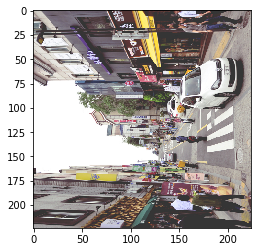

In [2]:
img = PIL.Image.open('timg.jpg')
img = torch.Tensor(np.array(img)).to(device)
img = img.transpose(0,2).transpose(1,2)
it = torch.nn.functional.interpolate(img.view(1,3,650,1200), size=224, mode='bilinear', align_corners=True)
Show = it.view(3,224,224).transpose(0,2)
plt.imshow(np.uint8(Show.data.cpu().numpy()))

In [3]:
sad = FloatVGG16.FloatVGG16().to(device)
happy = SampleVGG16.SampleVGG16().to(device)

In [4]:
model = torchvision.models.vgg16(pretrained=True).to(device)
lol = happy.state_dict()
a = lol.keys()
print len(a)
gt  = model.state_dict()
b = gt.keys()
for i in range(32):
    lol[a[i]] = gt[b[i]]
happy.load_state_dict(lol)
sad.load_state_dict(lol)

32


In [5]:
import time
st = time.time()
for i in range(100):
    o = happy(it.view(1,3,224,224)).argmax()
ed = time.time()
print ed - st
print o
st = time.time()
for i in range(100):
    o = sad(it.view(1,3,224,224)).argmax()
ed = time.time()
print ed - st
print o

0.545253992081
tensor(470, device='cuda:0')
0.37516617775
tensor(818, device='cuda:0')
